## <center>Binary Classification</center>


In [16]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784',version=1)


In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [11]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

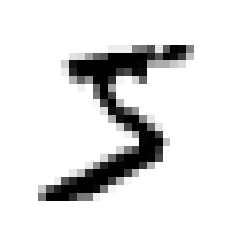

In [13]:
some_random_dig = X[0]
some_digit_image = some_random_dig.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [14]:
# This looks like 5 so lets check its label which is y
y[0]

'5'

**But we see that our label is string and our sklern models only accept numbers so converting it**

In [20]:
y = y.astype(np.uint8)
y[0]

5

In [21]:
# Train Test Split
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

### Training a Binary Classifier
- Attempting to classify only 5. To make it simple 5 or not 5.

In [24]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

#### Stochastic Gradient Descent (SGD) classifier

In [34]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
#Checking our classifier
sgd_clf.predict([X[0]])

array([ True])

## Evaluating the model now

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

**Woah... 95% accurate seems very high. This dumb classifier puts everything not 5 and 5 remember.This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).**

### Confusion Matrix

In [44]:
from sklearn.model_selection import cross_val_predict

In [45]:
y_trained_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

#### So what does cross_val_predict do...? 
Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold which we can then use to produce confusion matrix.

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_trained_pred)

array([[53892,   687],
       [ 1891,  3530]])

**Each row in a confusion matrix represents an actual class, while each column represents a predicted class.**

- The first row of this matrix considers non-5 images (the negative class): 
- - 53,892 of them were correctly classified as non-5s (they are called true negatives), while the remaining 687 were wrongly classified as 5s (false positives). 
- The second row considers the images of 5s (the positive class): 
- - 1,891 were wrongly classified as non-5s (false negatives), while the remaining 3,530 were correctly classified as 5s (true positives). 
**

**A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)**

### Precision and Recall

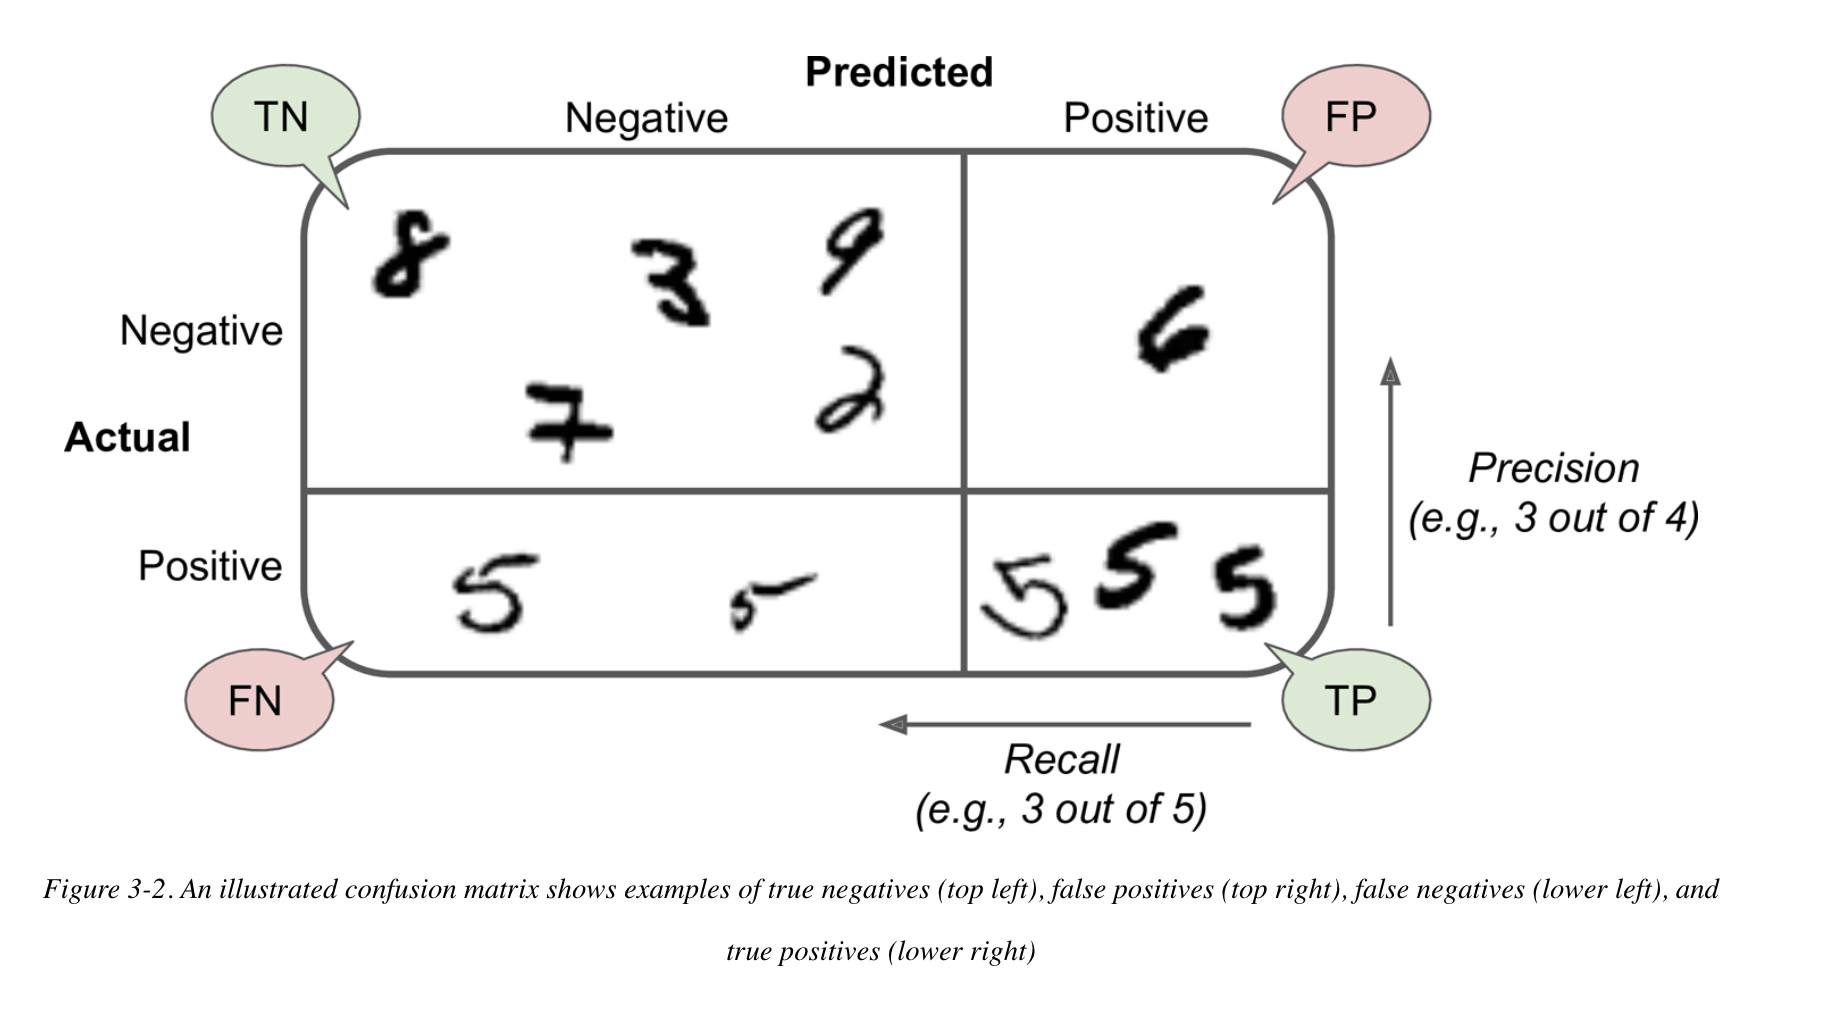

 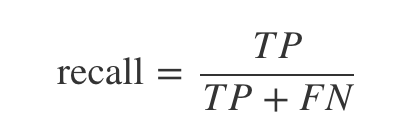

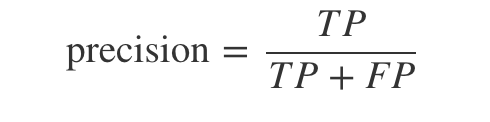

In [47]:
from sklearn.metrics import precision_score,recall_score

In [48]:
precision_score(y_train_5,y_trained_pred)

0.8370879772350012

In [49]:
recall_score(y_train_5,y_trained_pred)

0.6511713705958311

### When it claims an image represents a 5, it is correct only 83.7% of the time. Moreover, it only detects 65.11 of the 5s. So to combine these score in a single score we go ahead with `F1 Score` which is the harmonic mean of the precioson and recall thus giving an advantage over taking mean as harmonic means give more weightage to lower values and hence to get a good high  value we would have to have high precision and recall.

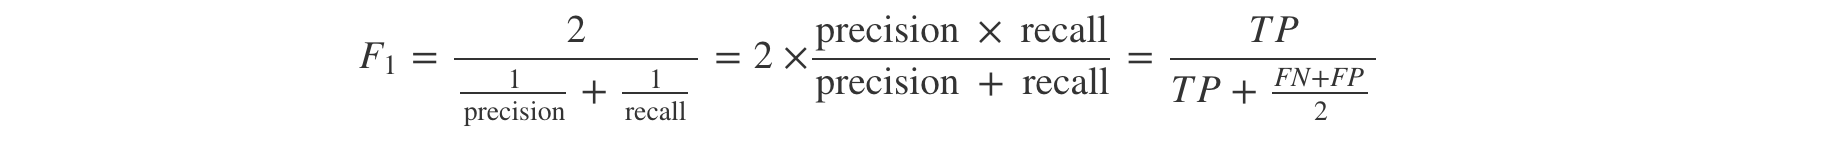


#### Understandint the precision and recall trade off

Suppose we are considering the case of getting suggestions on amazon.com.
This is pretty intuitive. If you have to recall everything, you will have to keep generating results which are not accurate, hence lowering your precision. To exemplify this, imagine the case of digital world (again, amazon.com?), wherein there is a limited space on each webpage, and extremely limited attention span of the customer. You have to provide 


In [50]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_trained_pred)

0.7325171197343846

**We do not always aim for a high f1 as it favours a condition with similar precision and recall. This will not always ideal as sometimes we would want to tune as per our needs** 
Suppose you train a classifier to detect shoplifters in surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

**Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off**

In [51]:
# decision function is for a single instance classification
y_scores = sgd_clf.decision_function([some_random_dig])
y_scores

array([2164.22030239])

In [52]:
threshold = 0 
y_scores > threshold

array([ True])

In [53]:
threshold = 8000
y_scores > threshold

array([False])

BUT THE IMAGE IS ACTUALLY A 5

#### PRECISION RECALL CURVE

In [57]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [85]:
precisions,recalls,threshold = precision_recall_curve(y_train_5,y_scores)

In [74]:
def plot_prec_recall_curve(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Precision')
    plt.legend()
    plt.xlabel('Thresholds')
    plt.ylabel('Precision and Recalls')
    plt.grid()

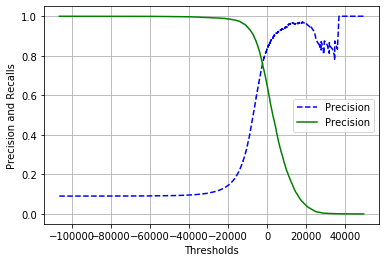

In [75]:
plot_prec_recall_curve(precisions,recalls,threshold)
plt.show()

For better understanding lets plot precion against recall

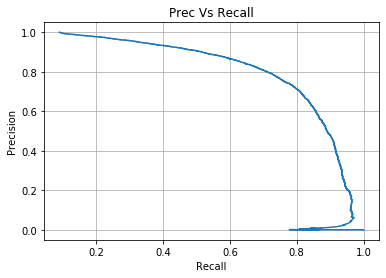

In [80]:
plt.plot(precisions[:-1],recalls[:-1])
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Prec Vs Recall')
plt.show()

**Planning at 90% precision from the first graph lets see the min threshold required.**

In [86]:
min_threshold = threshold[np.argmax(precisions >= 0.9)]
min_threshold

3370.0194991439557

### ROC Curve :
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 – the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [87]:
from sklearn.metrics import roc_curve

In [88]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

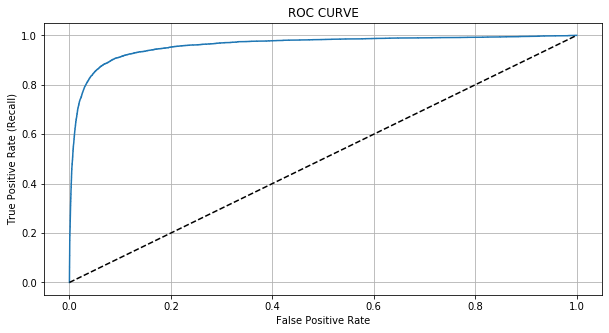

In [99]:
def plot_ROC(fpr,tpr):
    plt.figure(figsize=(10,5))
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC CURVE')
plot_ROC(fpr,tpr)
plt.show()

### trade-off: 
the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [100]:
from sklearn.metrics import roc_auc_score


In [101]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

**Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).**

### Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [108]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method= 'predict_proba')

In [112]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

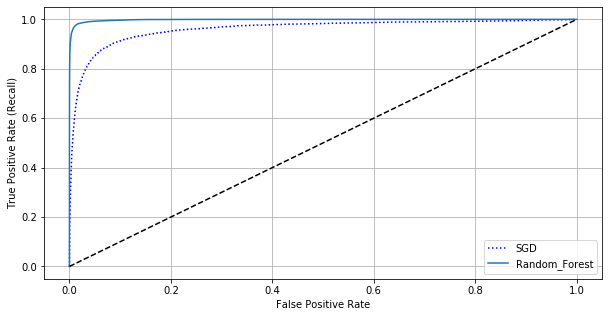

In [123]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest,tpr_forest,label='Random_Forest')
plt.grid()
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

The ROC curve for the Random Forest can be seen as better as it if far from the line. Lets see the score now

In [124]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [125]:
# Getting the precision and recall scores now
forest_precisions,forest_recalls,forest_thresholds = precision_recall_curve(y_train_5,y_scores_forest)

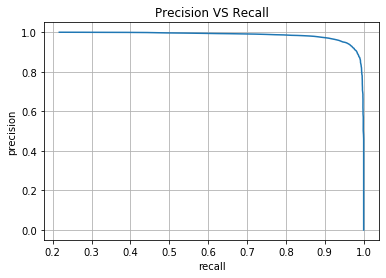

In [129]:
plt.plot(forest_precisions,forest_recalls,label='Random Forest')
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision VS Recall')
plt.show()

In [131]:
forest_recalls

array([1.        , 0.99981553, 0.9994466 , 0.99926213, 0.99852426,
       0.99667958, 0.99575724, 0.99465043, 0.99335916, 0.99262129,
       0.99151448, 0.99059214, 0.9891164 , 0.98745619, 0.98653385,
       0.9845047 , 0.98376683, 0.98247556, 0.98099982, 0.97933961,
       0.97712599, 0.97472791, 0.97214536, 0.97011621, 0.96679579,
       0.96421324, 0.96126176, 0.95849474, 0.95498985, 0.95111603,
       0.94871795, 0.9461354 , 0.94299945, 0.93931009, 0.93728094,
       0.93211585, 0.92897989, 0.92473713, 0.92123224, 0.91791182,
       0.9134846 , 0.90942631, 0.90555248, 0.8979893 , 0.89190186,
       0.88784357, 0.88157167, 0.87640657, 0.87253274, 0.86626084,
       0.86109574, 0.85482383, 0.8487364 , 0.84080428, 0.83397897,
       0.82604685, 0.82014388, 0.81276517, 0.80317285, 0.79394946,
       0.78527947, 0.7799299 , 0.77089098, 0.76166759, 0.74949271,
       0.74082273, 0.72975466, 0.71868659, 0.70817192, 0.69599705,
       0.68566685, 0.67478325, 0.65965689, 0.64545287, 0.63346

In [141]:
max(forest_recalls[forest_precisions >=0.99])
# So for the 99% marked precision we see that the recall is 86%

0.8662608374838591

## <center>Muticlass Classification</center>
**Some algorithms (such as Logistic Regression classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively. Others (such as SGD Classifiers or Support Vector Machine classifiers) are strictly binary classifiers.**

- One way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-the-rest (OvR) strategy (also called one-versus-all).Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. For most binary classification algorithms, however, OvR is preferred.
- Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvR or OvO,

In [142]:
from sklearn.svm import SVC

In [144]:
svm_clf = SVC()
svm_clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [149]:
svm_clf.predict([some_random_dig])

array([5], dtype=uint8)

In [157]:
# the decision_function() method, you will see that it returns 10 scores per instance (instead of just 1)
desc_func_scores = svm_clf.decision_function([some_random_dig])
desc_func_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [158]:
max_score = max(svm_clf.decision_function([some_random_dig])[0])
max_score


9.313248199189204

In [166]:
np.where(desc_func_scores == max_score)
# This is the fifth class score

(array([0]), array([5]))

In [167]:
np.argmax(desc_func_scores)

5

In [168]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [173]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

***Max accuracy came out to be 87.3%***

#### LETS SCALE AND CHECK THE OUTPUTS AND ACCURACY NOW

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [178]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

#### So Scaling does improve the performance significantly

### <center>Error Analysis